In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x=np.random.rand(100,1)-0.5
y=3*x[:,0]**2+0.05*np.random.random(100)

In [4]:
import pandas as pd
df= pd.DataFrame()

In [5]:
df['X']=x.reshape(100)
df['Y']=y


In [6]:
df

,X,Y
0,-0.125460,0.048792
1,0.450714,0.641251
2,0.231994,0.177181
3,0.098658,0.054629
4,-0.343981,0.400348
...,...,...
95,-0.006204,0.017576
96,0.022733,0.037848
97,-0.072459,0.060606
98,-0.474581,0.720035


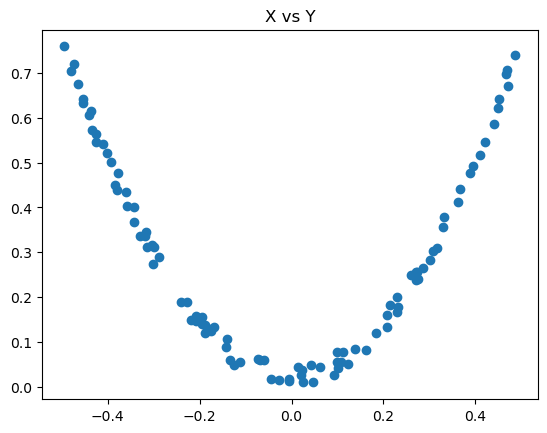

In [8]:
plt.scatter(df['X'],df['Y'])
plt.title('X vs Y')
plt.show()

In [1]:
# df['pred1'

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


In [26]:
cs=1
dfs=pd.DataFrame()
dfs['a']=[1,2,3]
dfs['a'+str(cs)]=dfs['a']
dfs

,a,a1
0,1,1
1,2,2
2,3,3


In [63]:
def Gradient_boost(df,number,count=1):
    # df['X']=x.reshape(100)
    # df['Y']=y
    tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

    if number !=0:
        if count==1:
            plt.scatter(df['X'],df['Y'])
            plt.title('X vs Y')
            plt.show()
            df['pred1']=df['Y'].mean()
            print(df)
           
            tree1.fit(df['X'].values.reshape(100,1),df['res'+str(count)].values)
            plot_tree(tree1)
            plt.show()
# .values.reshape(100,1)
        df['tree_pred'+str(count)]=tree1.predict(df['X'])
        df['pred'+str(count)] = df['Y'].mean()+ df['tree_pred'+str(count)]
     
        df['res'+str(count)]=df['Y']-df['pred'+str(count)]
        print(df)

        plt.scatter(df['X'],df['Y'])
        plt.plot(df['X'],df['pred'+str(count)],color='red')

    
        tree1.fit(df['X'].values.reshape(100,1),df['res'+str(count)].values)
        plot_tree(tree1)
        plt.show()

        # generating X_test
        X_test = np.linspace(-0.5, 0.5, 500)  
        y_pred = df['Y'].mean() + tree1.predict(X_test.reshape(500, 1))

        plt.figure(figsize=(14,4))
        plt.subplot(121)
        plt.plot(X_test, y_pred, linewidth=2,color='red')
        plt.scatter(df['X'],df['Y'])
        plt.show()

        Gradient_boost(df, number-1,count+1)

In [64]:
# Gradient_boost(x,y)

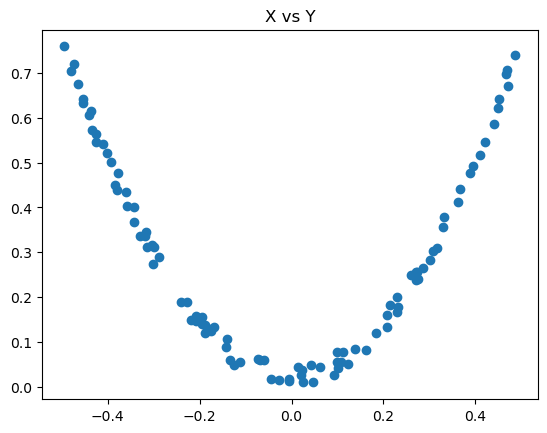

           X         Y     pred1      res1  tree_pred1
0  -0.125460  0.048792  0.290404 -0.013523   -0.228089
1   0.450714  0.641251  0.290404 -0.025193    0.376040
2   0.231994  0.177181  0.290404 -0.050802   -0.062420
3   0.098658  0.054629  0.290404 -0.007686   -0.228089
4  -0.343981  0.400348  0.290404  0.067064    0.042880
..       ...       ...       ...       ...         ...
95 -0.006204  0.017576  0.290404 -0.044739   -0.228089
96  0.022733  0.037848  0.290404 -0.024466   -0.228089
97 -0.072459  0.060606  0.290404 -0.001708   -0.228089
98 -0.474581  0.720035  0.290404  0.084942    0.344689
99 -0.392109  0.500241  0.290404  0.016520    0.193317

[100 rows x 5 columns]


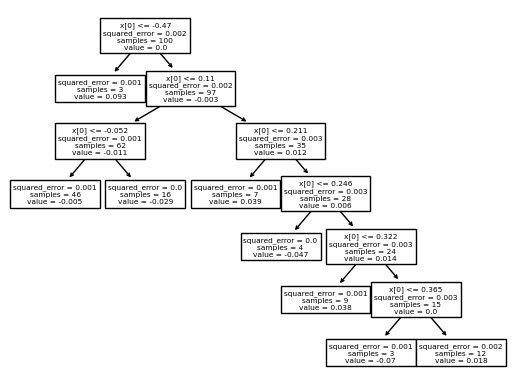

ValueError: Expected 2D array, got 1D array instead:
array=[-0.12545988  0.45071432  0.23199394  0.09865849 -0.34398136 -0.34400547
 -0.44191638  0.36617616  0.10111501  0.20807257 -0.4794155   0.46990985
  0.33244264 -0.2876609  -0.31817505 -0.3165955  -0.19575776  0.02475643
 -0.06805498 -0.20877086  0.11185289 -0.36050615 -0.20785536 -0.13363816
 -0.04393002  0.28517595 -0.30032623  0.01423444  0.09241457 -0.4535496
  0.10754485 -0.32947588 -0.4349484   0.44888553  0.46563202  0.30839735
 -0.19538623 -0.4023279   0.18423302 -0.05984751 -0.37796175 -0.00482309
 -0.4656115   0.4093204  -0.24122001  0.16252229 -0.18828893  0.02006802
  0.04671028 -0.31514555  0.4695846   0.27513283  0.43949893  0.39482734
  0.09789998  0.42187423 -0.4115075  -0.30401713 -0.4547727  -0.17466967
 -0.11132271 -0.22865097  0.3287375  -0.14324668 -0.21906549  0.04269608
 -0.35907578  0.30219698 -0.42544934  0.48688695  0.27224478 -0.3012843
 -0.49447787  0.31546143  0.20685734  0.22900717  0.27127033 -0.42595536
 -0.14153427 -0.38413095  0.36310342  0.12329812 -0.16910197 -0.43644166
 -0.18901768 -0.17481668  0.22960618  0.13755748  0.38721275 -0.02778507
 -0.38040575  0.21324478  0.26078504  0.0612772   0.2709672  -0.0062044
  0.02273283 -0.07245898 -0.47458088 -0.39210856].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
number =5
Gradient_boost(df,5)
# count=1

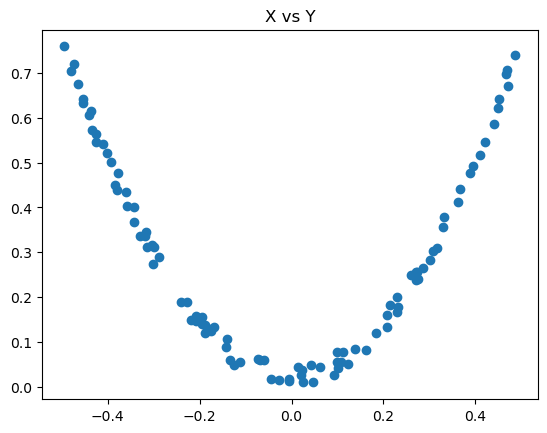

           X         Y     pred1      res1  tree_pred1
0  -0.125460  0.048792  0.290404 -0.013523   -0.228089
1   0.450714  0.641251  0.290404 -0.025193    0.376040
2   0.231994  0.177181  0.290404 -0.050802   -0.062420
3   0.098658  0.054629  0.290404 -0.007686   -0.228089
4  -0.343981  0.400348  0.290404  0.067064    0.042880
..       ...       ...       ...       ...         ...
95 -0.006204  0.017576  0.290404 -0.044739   -0.228089
96  0.022733  0.037848  0.290404 -0.024466   -0.228089
97 -0.072459  0.060606  0.290404 -0.001708   -0.228089
98 -0.474581  0.720035  0.290404  0.084942    0.344689
99 -0.392109  0.500241  0.290404  0.016520    0.193317

[100 rows x 5 columns]


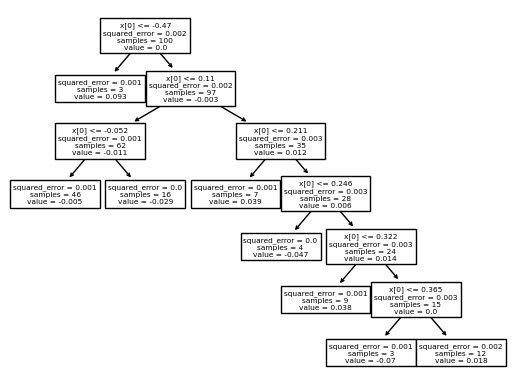

In [66]:
    tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

    if number !=0:
        if count==1:
            plt.scatter(df['X'],df['Y'])
            plt.title('X vs Y')
            plt.show()
            df['pred1']=df['Y'].mean()
            print(df)
           
            tree1.fit(df['X'].values.reshape(100,1),df['res'+str(count)].values)
            plot_tree(tree1)
            plt.show()

In [68]:
# .values.reshape(100,1)
        # df['tree_pred'+str(count)]=tree1.predict(df['X'])
        # df['pred'+str(count)] = df['Y'].mean()+ df['tree_pred'+str(count)]
        df['pred'+str(count)] = df['Y'].mean()+ tree1.predict(df['X'].values.reshape(100,1))
        df['res'+str(count)]=df['Y']-df['pred'+str(count)]
        print(df)

        plt.scatter(df['X'],df['Y'])
        plt.plot(df['X'],df['pred'+str(count)],color='red')

    
        tree1.fit(df['X'].values.reshape(100,1),df['res'+str(count)].values)
        plot_tree(tree1)
        plt.show()

        # generating X_test
        X_test = np.linspace(-0.5, 0.5, 500)  
        y_pred = df['Y'].mean() + tree1.predict(X_test.reshape(500, 1))

        plt.figure(figsize=(14,4))
        plt.subplot(121)
        plt.plot(X_test, y_pred, linewidth=2,color='red')
        plt.scatter(df['X'],df['Y'])
        plt.show()

IndentationError: unexpected indent (3416549534.py, line 4)